## Blackjack

In this exercise, you will implement **Monte Carlo Policy Evaluation (MCPE)** to learn the state-value function $V(s)$ for a given policy in the game of [blackjack](https://en.wikipedia.org/wiki/Blackjack).

### The game

**Rules.** We will use the version of the game discussed in the lectures where a single player (the agent) plays against the dealer. The player's objective is to obtain cards whose sum is as large as possible without exceeding 21. All face cards count as 10; an ace can count as either 1 or 11.

The game begins with two cards dealt to both the dealer and the player. The first of the dealer’s cards is face down and the second is face up. If the player has 21 immediately (for example, an ace and a face card), it is called a "blackjack". The player then wins unless the dealer also has a blackjack, in which case the game is a draw. If the player does not have a blackjack, then she can request additional cards, one by one (_hits_), until she either stops (_sticks_) or exceeds 21 (_goes bust_). If the player goes bust, she loses; if she sticks, then it becomes the dealer’s turn. 

The dealer hits or sticks according to a fixed strategy without choice: he sticks on any sum of 17 or greater, hits otherwise. If the dealer goes bust, then the player wins; otherwise, the outcome (win, lose, or draw) is determined by whose final sum is closer to 21.

**MDP formulation.** Playing blackjack is naturally formulated as an episodic finite MDP. Each game of blackjack is an episode. Rewards of +1, −1, and 0 are given for winning, losing, and drawing, respectively. All rewards until the end of the game are zero. We do not discount ($\gamma = 1$); therefore these terminal rewards are also the returns. The player’s actions are to `"hit"` or to `"stick"`. 

The states depend on the player’s cards and the dealer’s showing card. Assume that cards are dealt from an infinite deck (that is, with replacement) so that there is no advantage to keeping track of the cards already dealt. If the player holds an ace that she could count as 11 without going bust, then the ace is said to be _usable_. In this case it is always counted as 11 because counting it as 1 would make the sum 11 or less, in which case there is no decision to be made because, obviously, the player should always hit. Thus, the player makes decisions on the basis of three variables: 
- the player's current sum (an integer between 12 and 21);
- the dealer’s one showing card (an integer between 1 and 10; note that the ace is counted as 1 here); and
- whether or not the player holds a usable ace (a boolean). 

This makes for a total of 200 states. We represent the state as a numpy-array of length 3 that combines the just mentioned three variables in the given order. For example, if the player is given a 6 and a _jack_, and the dealer's showing card is an ace, the corresponding state will be the numpy array `[16, 1, False]`. The terminal state of the game will be denoted by the numpy array `[-1, -1, -1]`.

In [1]:
import blackjack
#env = blackjack.Blackjack(verbose=True)
env = blackjack.Blackjack(verbose=False)

In [22]:
import numpy as np
np.random.seed(8)
new_state, reward = env.make_step(action="reset")
print("Initial state:", new_state)
print("Reward:", reward)

Initial state: [20  7  0]
Reward: 0


The player drew two cards with face value 10 each. The dealer also drew two cards, but we can only see the second card, a 7. The player now can choose to "hit" or "stick". Most players would stick if they had 20 on their hand. We call again the `make_step()` method and specify `action="stick"`.

In [23]:
new_state, reward = env.make_step(action = "stick")
print("The player obtains a reward of", reward)
print("The new (terminal) state is:", new_state)

The player obtains a reward of 1
The new (terminal) state is: [-1 -1 -1]


The player won and received a reward of 1. Whenever an episode ends, the environment object sets the internal variable `self.active` to `False`. This variable is set to `True` again when we _reset_ the game. You can use the `self.active` variable to check whether an episode has ended or not.

In [27]:
np.random.seed(9)
new_state, reward = env.make_step(action="reset")
print("New state:", new_state)

New state: [18  2  1]


The player has already 18 points but has a _usable ace_, which she can transfer into a 1 whenever she would _go bust_. The player can thus "hit" and hope that she gets closer to 21. 

In [28]:
new_state, reward = env.make_step(action = "hit")
new_state

array([20,  2,  1])

Great! The player got another 2 points and has again 20 points. The player would probably want to "stick" again...

In [29]:
new_state, reward = env.make_step(action = "stick")
new_state

array([-1, -1, -1])

The player won again! Let's play a last one.

In [7]:
np.random.seed(7)
new_state, reward = env.make_step()
print("Reward:", reward)

Reward: 1


The player drew a "Blackjack", that is, an ace and a 10. The dealer's cards valued 16. The player won again and received a reward without having performed an action. Try out some more games to get familiar with the code!

### Implement

Coding for **"Stick if the player's sum is 19 or higher, and hit otherwise."**. The following code compute these state values using **Monte Carlo Policy Evaluation (MCPE)**. the pseudo-code for MCPE is reproduced below from the textbook (Reinforcement Learning, Sutton & Barto, 1998, Section 5.1).

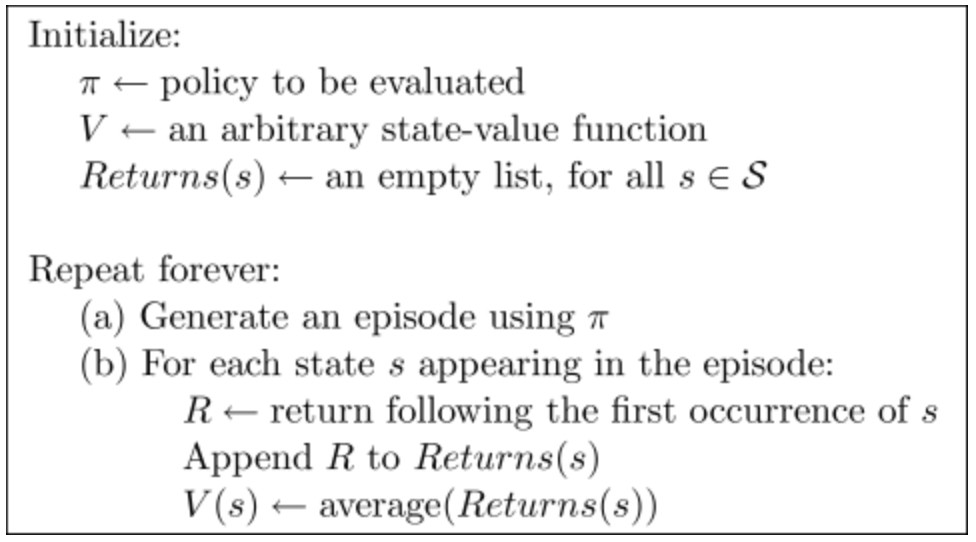

The pseudo-code shows _first-visit_ MCPE. No state occurs twice during one game (episode) of Blackjack. In this case, first-visit MCPE and every-visit MCPE are identical.

The function `get_state_value(s, v)` that takes as input a state `s` (a numpy array of length 3 as described in the MDP formulation of blackjack) and the state values `v`. The `get_state_value(s, v)` return the corresponding state value $V(s)$ as a float. There are no restrictions on how you store the state values `v`.

In [8]:
np.random.seed(7)
new_state, reward = env.make_step()
print("Reward:", reward)

Reward: 1


In [9]:
# define policy function,Stick if the player's sum is 19 or higher, otherwise hit
def policy(state):
      
    if state[0] >= 19:
        action = "stick"
    else:
        action = "hit"
        
    return action

In [10]:
# This cell should compute the state values 'v' using MCPE.

def state_value(num_episodes):
    # use dictionary to storge every state sum value and the number of occurrences
    state_count = {}
    episode_dict ={}
    for i in range (1, num_episodes + 1):
        # Generate an episode. episode is a round of game
        episode = {}

        state, reward = env.make_step(action="reset")
        initial_state = np.zeros(3)
        #To determine whether the initial state has win the game
        if state[2] ==-1: 
            ace = env.player_has_usable_ace
            # obtain the number of initial state 
            initial_state = np.array([np.asscalar(env.player_sum), env.dealers_showing_card, int(ace)])       
            # get the value of initial state
            episode[repr(initial_state)] = reward

            for key, value in episode.items():
                # key is a string, this step is to change string into array
                npkey = np.fromstring(str(key[7:-2]).replace(' ',''), dtype=int, sep=',')
                key = npkey
                # to determine whether has been happened before
                # if it happed, sum the value and count number. 
                # if it is the first time, input the current value and record the 1 as count
                if repr(key) not in episode_dict.keys():
                    state_count[repr(key)] = 1
                    episode_dict[repr(key)] = value
                else:
                    state_count[repr(key)] +=1               
                    episode_dict[repr(key)] += value

        else:
            # To determine whether end of game, use while loop until game is over
            while state[2] !=-1:
                # initial episode value to 0
                episode[repr(state)] = 0
                next_state, rewards = env.make_step(action = policy(state))

                state = next_state

            for key, value in episode.items():
                episode[key] = rewards

            for key, value in episode.items():

                npkey = np.fromstring(str(key[7:-2]).replace(' ',''), dtype=int, sep=',')
                key = npkey


                if repr(key) not in episode_dict.keys():
                    state_count[repr(key)] = 1
                    episode_dict[repr(key)] = value
                else:
                    state_count[repr(key)] +=1               
                    episode_dict[repr(key)] += value
    #generate V as dictionary to storage 200 state value
    V={}
    #final every state value is the average of total same state
    for key in state_count.keys():
        V[key] = episode_dict[key] / state_count[key]  

    return V

In [12]:
def get_state_value(s, v):
    
    for key, value in v.items():
        # change the key data type
        npkey = np.fromstring(str(key[7:-2]).replace(' ',''), dtype=int, sep=',')
        # find the current state and obtain the state value
        if np.array_equal(npkey, s):
            value_of_s = v[key]
    return value_of_s

In [13]:
env = blackjack.Blackjack(verbose=False)
#run MCPE for 100000 times.
V = state_value(100000)
new_state, reward = env.make_step(action="reset")

In [14]:
V

{'array([18,  1,  0])': -0.7170172084130019,
 'array([16,  5,  0])': -0.5385338345864662,
 'array([17,  5,  0])': -0.5834829443447038,
 'array([21,  5,  0])': 0.9116347569955817,
 'array([19,  8,  0])': 0.5517578125,
 'array([13, 10,  0])': -0.5067837190742218,
 'array([15, 10,  0])': -0.5654437283093704,
 'array([19,  3,  0])': 0.4336782690498589,
 'array([12, 10,  0])': -0.49403069926094373,
 'array([13,  6,  0])': -0.38672286617492097,
 'array([18,  6,  0])': -0.5782442748091603,
 'array([21, 10,  0])': 0.8855534709193246,
 'array([13,  2,  0])': -0.41455696202531644,
 'array([17,  9,  0])': -0.6041666666666666,
 'array([18,  9,  0])': -0.5791469194312796,
 'array([20, 10,  0])': 0.43258426966292135,
 'array([21,  2,  0])': 0.9216589861751152,
 'array([20, 10,  1])': 0.3838526912181303,
 'array([18, 10,  0])': -0.6784992136598517,
 'array([19, 10,  0])': 0.010605703511666275,
 'array([13,  8,  0])': -0.4221724524076148,
 'array([21,  8,  0])': 0.9285714285714286,
 'array([20,  3,  0

In [15]:
y = get_state_value(new_state, V)
print('state:',new_state)
y

state: [19  9  0]


0.2593283582089552